### Signal Filtering

#### Test filtering out with some EEG data

In [1]:
import torch
from data import AnomalyDatasetByConcat, EEGDataset, normalize, stackplot, butter_lowpass_filter2
from dynaconf import settings

In [7]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 7]

In [3]:
train_dataset = EEGDataset(settings.TRAIN_DATASET_CSV, 1000, settings.SELECT_CHANNELS, max_num_examples=500, transform=normalize)

Found 2765 recordings
By set limit only using 500 recordings
Removing recordings of insufficient length...
Removed 1 of 500 recordings. There are now 499 recordings.


In [4]:
num_examples = 16
sample_batch = torch.cat([train_dataset[i] for i in range(num_examples)])

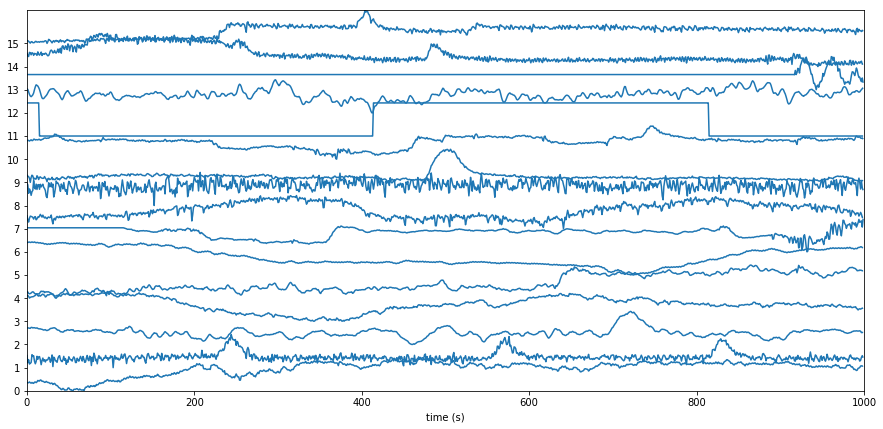

In [8]:
# without low pass filtering
stackplot(sample_batch)

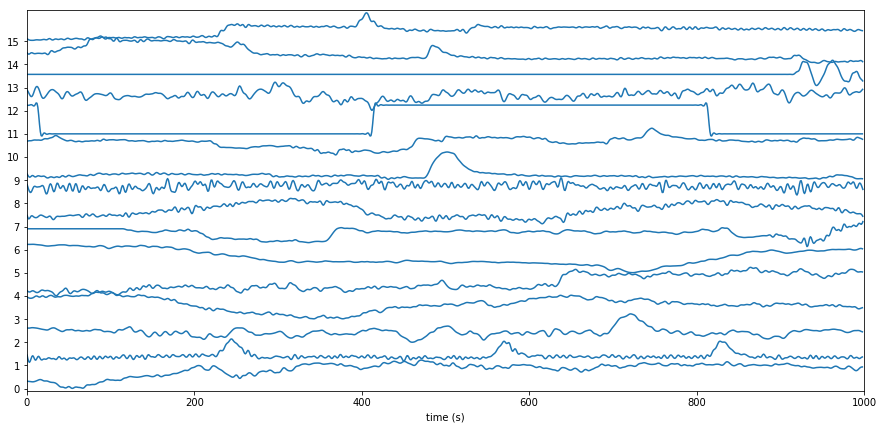

In [11]:
sample_batch_filtered = butter_lowpass_filter2(
    data=sample_batch,
    cutoff = 40,
    fs=250,
    order=5, # ?
)
stackplot(sample_batch_filtered)